<a href="https://colab.research.google.com/github/Alex-Witt/DS-Unit-1-Sprint-1-Dealing-With-Data/blob/master/module1-afirstlookatdata/LS_DS_111_A_First_Look_at_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lambda School Data Science - A First Look at Data



## Lecture - let's explore Python DS libraries and examples!

The Python Data Science ecosystem is huge. You've seen some of the big pieces - pandas, scikit-learn, matplotlib. What parts do you want to see more of?

In [0]:
# TODO - we'll be doing this live, taking requests
# and reproducing what it is to look up and learn things

1 + 1
print("This is a Change")

This is a Change


## Assignment - now it's your turn

Pick at least one Python DS library, and using documentation/examples reproduce in this notebook something cool. It's OK if you don't fully understand it or get it 100% working, but do put in effort and look things up.

The Notebook I decided on was the **SF Drug Geography** by Lance Martin. 

**Original Notebook**: https://github.com/lmart999/GIS/blob/master/SF_GIS_Crime.ipynb

**Data Set Location**: https://data.sfgov.org/Public-Safety/Police-Department-Incident-Reports-Historical-2003/tmnf-yvry

The dataset that I am using is an updated version with far more entries in it. First I will repeat some of the broad Crime Visualizations Lance put together now that there is more data at my disposal. 

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime

In [2]:
df = pd.read_csv("https://www.dropbox.com/s/v1s4hhj2hlghr99/Police_Department_Incident_Reports__Historical_2003_to_May_2018.csv?dl=1")
df.shape

(2215024, 13)

In [3]:
df.head(5)

,IncidntNum,Category,Descript,DayOfWeek,Date,Time,PdDistrict,Resolution,Address,X,Y,Location,PdId
0,150060275,NON-CRIMINAL,LOST PROPERTY,Monday,01/19/2015,14:00,MISSION,NONE,18TH ST / VALENCIA ST,-122.421582,37.761701,"(37.7617007179518, -122.42158168137)",15006027571000
1,150098210,ROBBERY,"ROBBERY, BODILY FORCE",Sunday,02/01/2015,15:45,TENDERLOIN,NONE,300 Block of LEAVENWORTH ST,-122.414406,37.784191,"(37.7841907151119, -122.414406029855)",15009821003074
2,150098210,ASSAULT,AGGRAVATED ASSAULT WITH BODILY FORCE,Sunday,02/01/2015,15:45,TENDERLOIN,NONE,300 Block of LEAVENWORTH ST,-122.414406,37.784191,"(37.7841907151119, -122.414406029855)",15009821004014
3,150098210,SECONDARY CODES,DOMESTIC VIOLENCE,Sunday,02/01/2015,15:45,TENDERLOIN,NONE,300 Block of LEAVENWORTH ST,-122.414406,37.784191,"(37.7841907151119, -122.414406029855)",15009821015200
4,150098226,VANDALISM,"MALICIOUS MISCHIEF, VANDALISM OF VEHICLES",Tuesday,01/27/2015,19:00,NORTHERN,NONE,LOMBARD ST / LAGUNA ST,-122.431119,37.800469,"(37.8004687042875, -122.431118543788)",15009822628160


It appears we have roughly 500,000 more rows than the previous dataset. The first problem I start running into as an inexperienced programmer, is that the dataset is taking a while to do things. This is not good for me, as I need to constantly test my code to catch errors. My first thought was to create a smaller sample using train_test_split to create a smaller dataset that was still workable. At the same time, I created another 5 row dataframe so I could test my code. Inevitably, neither turned out to work with my end goal. The code is below so you can see some of my work. 

In [4]:
from sklearn.model_selection import train_test_split
df_x, df_y = train_test_split(df.copy(), random_state = 0)
df_y.shape

(553756, 13)

In [5]:
tst = pd.DataFrame()
rest = pd.DataFrame()

if len(df) > 5: 
    tst = df[:5]
    rest = df[5:]
    
tst.head()

,IncidntNum,Category,Descript,DayOfWeek,Date,Time,PdDistrict,Resolution,Address,X,Y,Location,PdId
0,150060275,NON-CRIMINAL,LOST PROPERTY,Monday,01/19/2015,14:00,MISSION,NONE,18TH ST / VALENCIA ST,-122.421582,37.761701,"(37.7617007179518, -122.42158168137)",15006027571000
1,150098210,ROBBERY,"ROBBERY, BODILY FORCE",Sunday,02/01/2015,15:45,TENDERLOIN,NONE,300 Block of LEAVENWORTH ST,-122.414406,37.784191,"(37.7841907151119, -122.414406029855)",15009821003074
2,150098210,ASSAULT,AGGRAVATED ASSAULT WITH BODILY FORCE,Sunday,02/01/2015,15:45,TENDERLOIN,NONE,300 Block of LEAVENWORTH ST,-122.414406,37.784191,"(37.7841907151119, -122.414406029855)",15009821004014
3,150098210,SECONDARY CODES,DOMESTIC VIOLENCE,Sunday,02/01/2015,15:45,TENDERLOIN,NONE,300 Block of LEAVENWORTH ST,-122.414406,37.784191,"(37.7841907151119, -122.414406029855)",15009821015200
4,150098226,VANDALISM,"MALICIOUS MISCHIEF, VANDALISM OF VEHICLES",Tuesday,01/27/2015,19:00,NORTHERN,NONE,LOMBARD ST / LAGUNA ST,-122.431119,37.800469,"(37.8004687042875, -122.431118543788)",15009822628160


Most of my work was with these two datasets so you. For the purpose of this Notebook I trimmed all that out and applied that code to the big dataset. I wanted to use either Matplotlib or Pandas to visualize a Bar Plot that placed new values on top of older values. Using Pandas I would sort and split the dataframe by date (Index is does not associate by date). The resulting code and plots are below. 

In [6]:
#Convert the Date Column to Datetime. 
 

df.Date = pd.to_datetime(df.Date)   #This is the one bug I couldn't shake.
df.sort_values('Date')

,IncidntNum,Category,Descript,DayOfWeek,Date,Time,PdDistrict,Resolution,Address,X,Y,Location,PdId
973184,30003438,OTHER OFFENSES,VIOLATION OF RESTRAINING ORDER,Wednesday,2003-01-01,20:05,TARAVAL,"ARREST, BOOKED",0 Block of MARGARET AV,-122.452082,37.717946,"(37.7179464224186, -122.452082157645)",3000343815150
788533,21623770,"SEX OFFENSES, FORCIBLE",CHILD ABUSE SEXUAL,Wednesday,2003-01-01,00:01,MISSION,UNFOUNDED,2600 Block of BRYANT ST,-122.408983,37.751987,"(37.751987040935, -122.408983439759)",2162377014015
1673086,30005456,NON-CRIMINAL,"DEATH REPORT, CAUSE UNKNOWN",Wednesday,2003-01-01,23:00,MISSION,NONE,4000 Block of 18TH ST,-122.434457,37.760977,"(37.7609766090845, -122.434457353955)",3000545661030
919219,30003604,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,2003-01-01,21:55,BAYVIEW,"ARREST, BOOKED",5100 Block of 3RD ST,-122.392073,37.731263,"(37.7312628705449, -122.392073035014)",3000360465010
1779104,50531942,ASSAULT,WILLFUL CRUELTY TO CHILD,Wednesday,2003-01-01,00:01,INGLESIDE,CLEARED-CONTACT JUVENILE FOR MORE INFO,200 Block of FOERSTER ST,-122.448789,37.730294,"(37.7302942959545, -122.448788598668)",5053194215100
524087,30000484,ASSAULT,BATTERY,Wednesday,2003-01-01,02:00,CENTRAL,NONE,WASHINGTON ST / THE EMBARCADERO NORTH ST,-122.395330,37.796665,"(37.7966652982785, -122.39532966299)",3000048404134
1402375,30001090,ASSAULT,AGGRAVATED ASSAULT WITH A DEADLY WEAPON,Wednesday,2003-01-01,03:55,TARAVAL,"ARREST, BOOKED",500 Block of JOHN MUIR DR,-122.492068,37.714362,"(37.7143615498756, -122.49206801734)",3000109004013
750255,30003018,OTHER OFFENSES,RESISTING ARREST,Wednesday,2003-01-01,15:24,TARAVAL,"ARREST, BOOKED",100 Block of LOUISBURG ST,-122.449645,37.721080,"(37.7210803010507, -122.44964547844)",3000301827170
1445345,30173235,LARCENY/THEFT,GRAND THEFT FROM A BUILDING,Wednesday,2003-01-01,08:00,MISSION,NONE,2600 Block of 18TH ST,-122.408686,37.761901,"(37.7619007350286, -122.408686198578)",3017323506304
443466,30610293,SUSPICIOUS OCC,SUSPICIOUS OCCURRENCE,Wednesday,2003-01-01,09:00,MISSION,NONE,200 Block of CHATTANOOGA ST,-122.426335,37.752554,"(37.752554160607, -122.426334982169)",3061029364070


In [0]:
#Now to split between old dataframe and new data. 
#This is based on the previous max date of 02/13/2015

split_date = pd.datetime(2015,2,13)

df_old = df.loc[df['Date'] <= split_date]
df_new = df.loc[df['Date'] > split_date]

I really like the idea of defining a function to plot things more efficiently. This could allow me to play around with multiple plots if I want to dive into this visualization. 

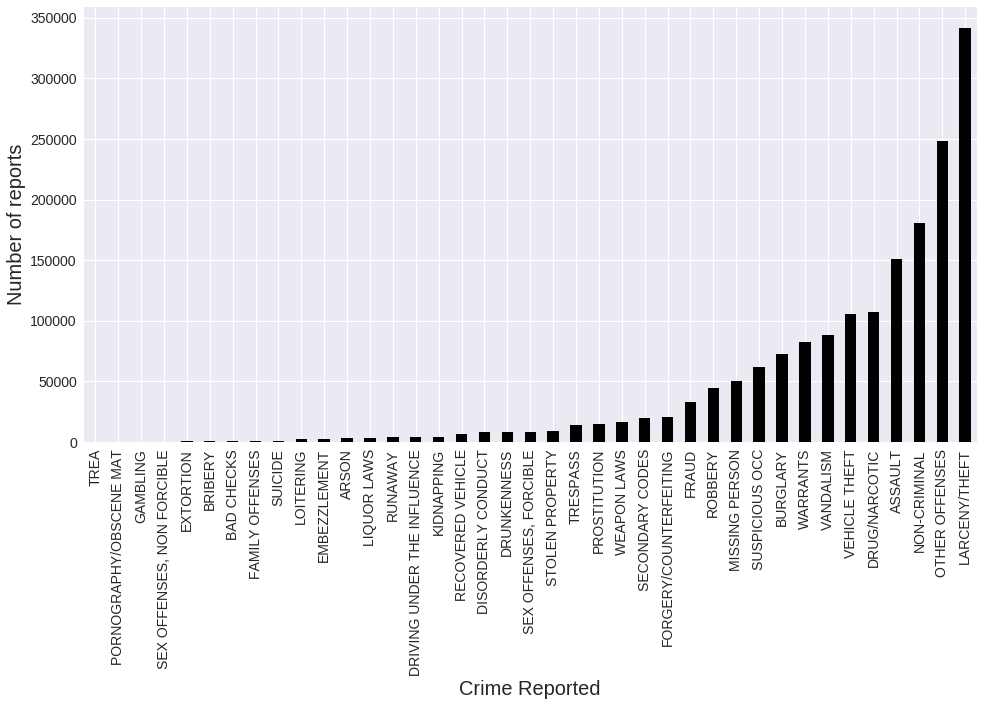

In [8]:
def single_bar_plot (data,category):
    rep = data.groupby(category).size().sort_values()
    fig = plt.figure(figsize=(16,8))
    plt.yticks(fontsize=10)
    rep.plot(kind='bar',fontsize=14,color='k')
    plt.xlabel('Crime Reported', fontsize=20)
    plt.ylabel('Number of reports',fontsize=20)

single_bar_plot(df_old,'Category')

We can also try plotting it by neighborhood. 

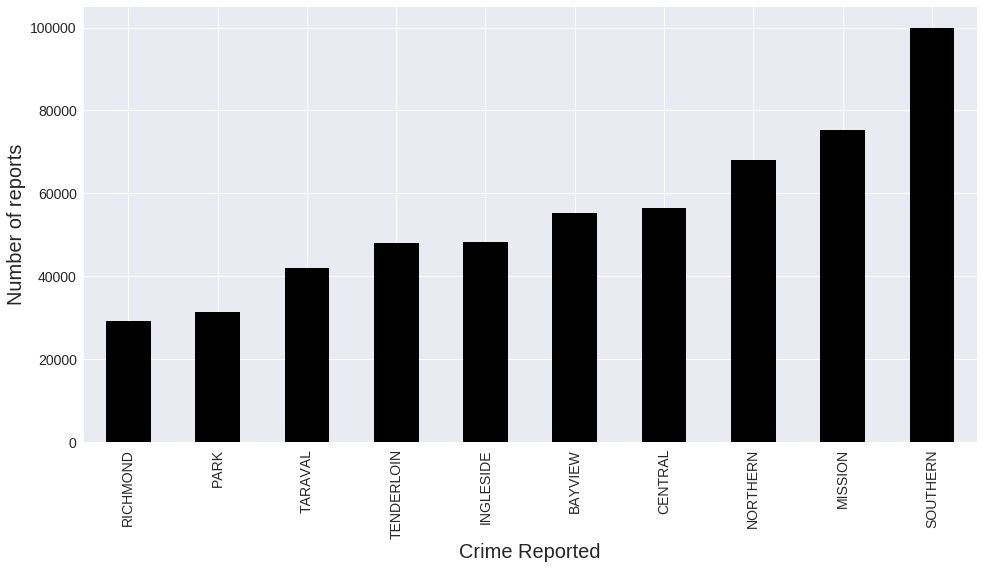

In [9]:
single_bar_plot(df_y,'PdDistrict')

My code is broken on the Stacked Bar visualization. 

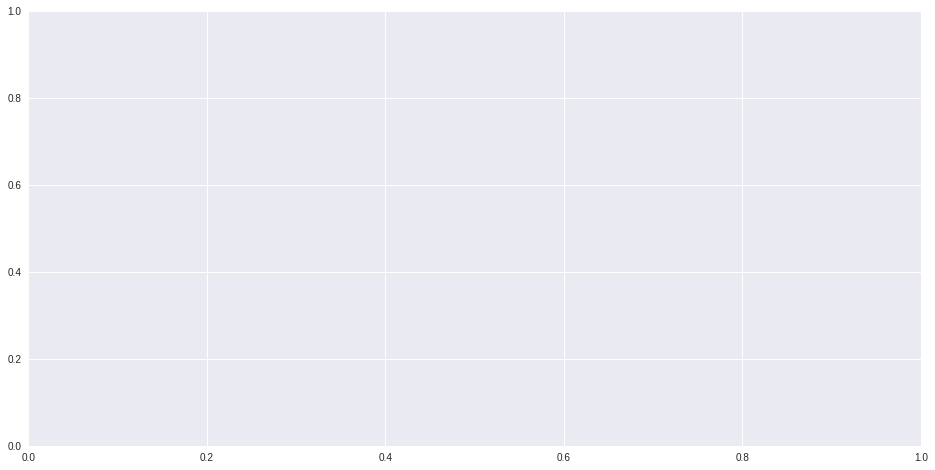

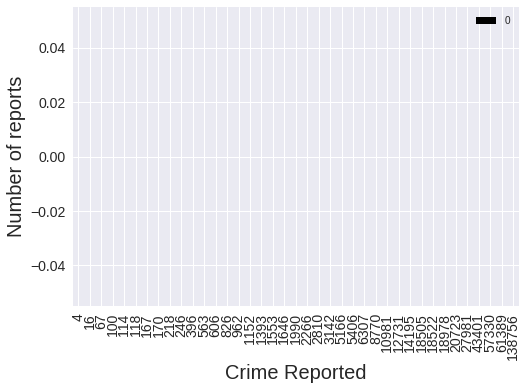

In [31]:
def multi_bar_plot (d_1, d_2 ,category):
    
    dplt_1 = d_1.groupby(category).size().sort_values()
    dplt_2 = d_2.groupby(category).size().sort_values()
    df_2  = pd.DataFrame(dplt_1, dplt_2)
    fig = plt.figure(figsize=(16,8))
    plt.yticks(fontsize=10)
    df_2.plot(kind='bar',fontsize=14, stacked=True, color = 'k')
    plt.xlabel('Crime Reported', fontsize=20)
    plt.ylabel('Number of reports',fontsize=20)

multi_bar_plot(df_old, df_new ,'Category')

In [22]:
old_cat = df_old.groupby('Category').size().sort_values()
old_cat

Category
TREA                               10
PORNOGRAPHY/OBSCENE MAT            43
GAMBLING                          281
SEX OFFENSES, NON FORCIBLE        313
EXTORTION                         571
BRIBERY                           595
BAD CHECKS                        825
FAMILY OFFENSES                  1016
SUICIDE                          1046
LOITERING                        2316
EMBEZZLEMENT                     2425
ARSON                            2969
LIQUOR LAWS                      3687
RUNAWAY                          3834
DRIVING UNDER THE INFLUENCE      4520
KIDNAPPING                       4520
RECOVERED VEHICLE                6450
DISORDERLY CONDUCT               8394
DRUNKENNESS                      8433
SEX OFFENSES, FORCIBLE           8600
STOLEN PROPERTY                  9081
TRESPASS                        14283
PROSTITUTION                    15148
WEAPON LAWS                     16828
SECONDARY CODES                 19524
FORGERY/COUNTERFEITING          21060
FRA

# To Be Continued!

### Assignment questions

After you've worked on some code, answer the following questions in this text block:

1.  Describe in a paragraph of text what you did and why, as if you were writing an email to somebody interested but nontechnical.

2.  What was the most challenging part of what you did?

3.  What was the most interesting thing you learned?

4.  What area would you like to explore with more time?




## Stretch goals and resources

Following are *optional* things for you to take a look at. Focus on the above assignment first, and make sure to commit and push your changes to GitHub (and since this is the first assignment of the sprint, open a PR as well).

- [pandas documentation](https://pandas.pydata.org/pandas-docs/stable/)
- [scikit-learn documentation](http://scikit-learn.org/stable/documentation.html)
- [matplotlib documentation](https://matplotlib.org/contents.html)
- [Awesome Data Science](https://github.com/bulutyazilim/awesome-datascience) - a list of many types of DS resources

Stretch goals:

- Find and read blogs, walkthroughs, and other examples of people working through cool things with data science - and share with your classmates!
- Write a blog post (Medium is a popular place to publish) introducing yourself as somebody learning data science, and talking about what you've learned already and what you're excited to learn more about.